Mejores hiperparámetros: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Error cuadrático medio en el conjunto de prueba: 0.031690972222222225
Precisión del modelo (R^2): 87.32%


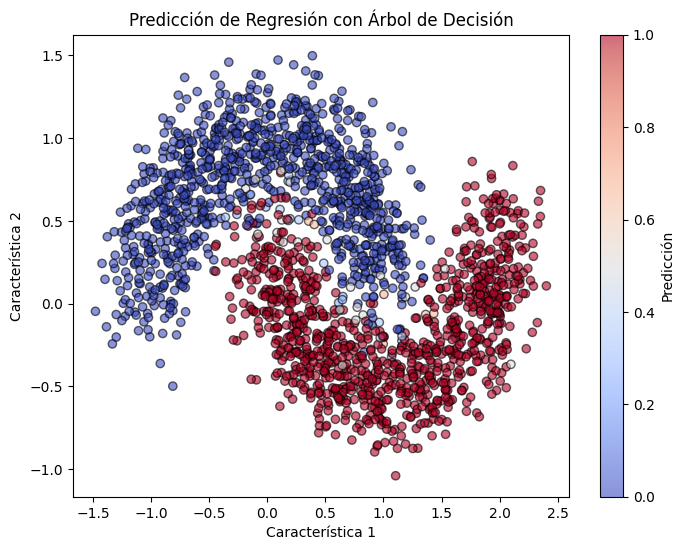

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generar el dataset con 10,000 muestras y ruido reducido
X, y = make_moons(n_samples=10000, noise=0.2, random_state=42)  # Reducir aún más el ruido

# Dividir el conjunto en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo base de Árbol de Decisión
regressor = DecisionTreeRegressor(random_state=42)

# Definir la búsqueda de hiperparámetros con mayor granularidad
param_grid = {
    'max_depth': [15, 20, 25, None],  # Aumentar la profundidad máxima
    'min_samples_split': [2, 3, 5],  # Refinar el número mínimo de muestras por división
    'min_samples_leaf': [1, 2],  # Mantener hojas pequeñas para mayor detalle
    'max_features': [None, 'sqrt', 'log2']  # Añadir selección de características para mejorar generalización
}

# Aplicar validación cruzada y búsqueda de hiperparámetros
grid_search = GridSearchCV(regressor, param_grid, cv=10, scoring='r2', n_jobs=-1)  # Aumentar validación cruzada a 10
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo encontrado
best_regressor = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo en el conjunto de prueba
y_pred = best_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) * 100  # Convertir R^2 a porcentaje

print("Error cuadrático medio en el conjunto de prueba:", mse)
print(f"Precisión del modelo (R^2): {r2:.2f}%")

# Visualizar la predicción
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', alpha=0.6, edgecolors='k')
plt.title("Predicción de Regresión con Árbol de Decisión")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.colorbar(label="Predicción")
plt.show()